<a href="https://colab.research.google.com/github/rishiselvakumaran98/digit_recogniser/blob/main/Final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Topic 1: Neural Network for image classification**
### Rishi Selvakumaran (selva053)

## Overview

#### **What is the data set we are using?**

In this final project we will be using the [digit recognition](https://www.kaggle.com/competitions/digit-recognizer/data) data set. It is a massive dataset consisting of train and test data of image pixels of digits. Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive [1].

[1] For more information on the dataset, check out the [kaggle site](https://www.kaggle.com/competitions/digit-recognizer/data).

#### **What is the problem we are solving?**

We would be training and validating a set of digit recognition data found on [kaggle site](https://www.kaggle.com/competitions/digit-recognizer/data) to determine how accurate our data modeling is able to recognize the digits from the testing dataset 

After validating the data model using Pandas, and Pyspark ML, analysis on the data modelling performed will be written.

This notebook would consist of the three sections:

1. *Exploratory Data Analysis* - for exploring and preprocessing the data
2. *Model Experiments* – for training, tuning, and validating models
3. *Results Analysis* – for analyzing and interpreting model results




#### **What tools are we using?**

Like the previous lab assignments we would be using PySpark, Pandas, Numpy, and Scikit Learn in addition with Spark ML modules

## Setup

In [ ]:
# We install the required dependencies, kaggle and pyspark for to perform EDA for MSINT
!pip install -q pyspark

In [ ]:
# Set up Spark Session
from pyspark.sql import SparkSession
spark = SparkSession.builder \
    .master("local") \
    .appName("Final_project") \
    .getOrCreate()

In [ ]:
# Then import tools and packages needed for the data processing
from pyspark.ml.classification import MultilayerPerceptronClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml import Pipeline
from pyspark.sql.functions import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Exploratory Data Analysis (EDA)

In the following codes, we use pandas dataframe and Matplotlib to sequentially view the digit images to see how they all look like

In [ ]:
# Initialize train and test data
train_df = pd.read_csv('drive/MyDrive/Colab Notebooks/digit_recognizer/train.csv')
print("Train Data")
train_df.head()

Train Data


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test_df = pd.read_csv('drive/MyDrive/Colab Notebooks/digit_recognizer/test.csv')
print("Test Data")
test_df.head()

Test Data


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


View data set

In [ ]:
# type cast the existing train_df data into float data type
unlabelled_df = train_df.drop(columns = ['label']).values.astype('float32')
label_df = train_df['label'].values.astype('float32')

In [ ]:
# normalize the pixel values by dividing the image pixel values by 255
unlabelled_df = unlabelled_df/255.0
label_df = label_df/255.0

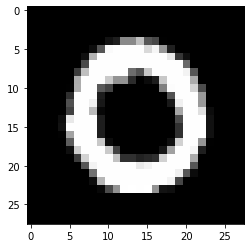

In [ ]:
# We select a normalized image from the row of images 
sample_image = unlabelled_df[1]
# we resize the image to its standardized pixel value of 28 by 28
sample_image_pixel = np.reshape(sample_image, (28, 28))

# We use matplotlib to show the image after it resized to its pixel value 28 by 28
plt.imshow(sample_image_pixel, cmap='gray')
plt.show()

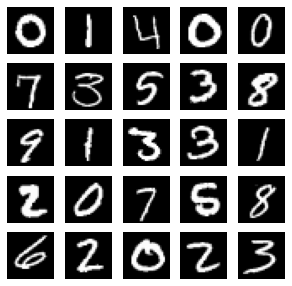

In [ ]:
# view 5 by 5 images of the digits of numbers in the training df
row = 5
col = 5
fig_map = plt.figure(figsize = (5,5))
for i in range(1, row*col+1):
  img=unlabelled_df[i]
  img_resize = np.reshape(img, (28,28))
  fig_map.add_subplot(row, col, i)
  plt.imshow(img_resize, cmap = 'gray') # blue
  plt.axis('off')
plt.show()

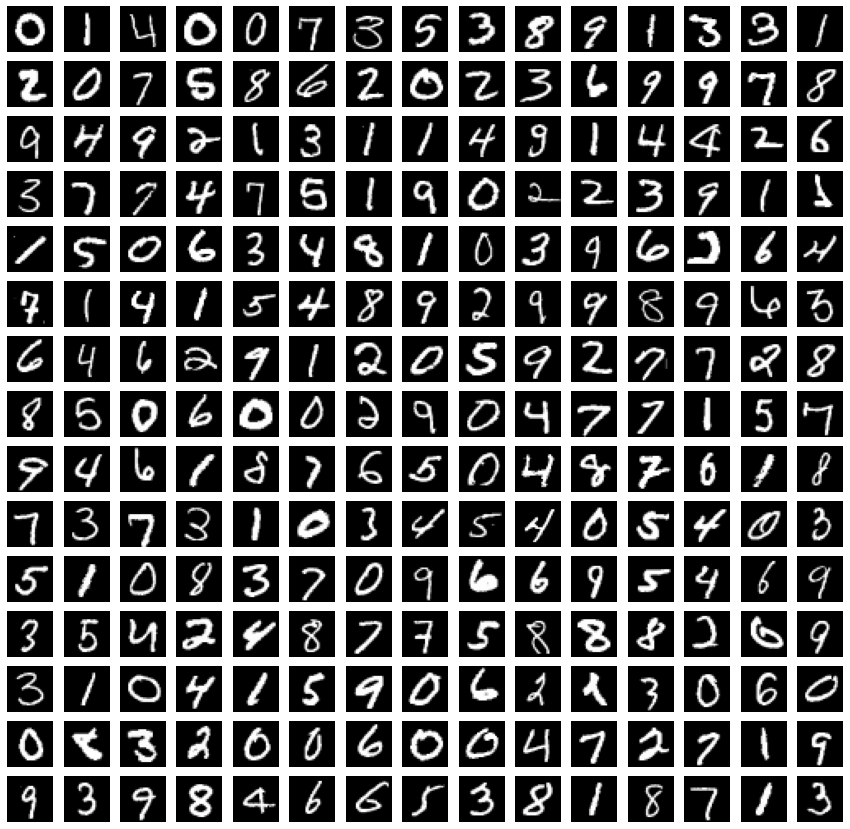

In [ ]:
# view 5 by 5 images of the digits of numbers in the training df
row = 15
col = 15
fig_map = plt.figure(figsize = (15,15))
for i in range(1, row*col+1):
  img=unlabelled_df[i]
  img_resize = np.reshape(img, (28,28))
  fig_map.add_subplot(row, col, i)
  plt.imshow(img_resize, cmap = 'gray') # blue
  plt.axis('off')
plt.show()

# Model Experiments

In the following code segments we would analyze the image dataset using spark for the train and test dataframes and then define differing hyperparameters in the MultiLayer Perceptron Classifier to check for the accuracy of the train and test data sets.

In [ ]:
# spark read load code retrieved from lab 7
train_data = (spark.read.load("drive/MyDrive/Colab Notebooks/digit_recognizer/train.csv",  
    format="csv",
    sep=",",  
    inferSchema="true", 
    header="true"))
train_data.show()
# To predict the accuracy of the models we split 80% of the data to train and 20% data for test
(train_df, test_df) = train_data.randomSplit([.80, .20])

+-----+------+------+------+------+------+------+------+------+------+------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+-----

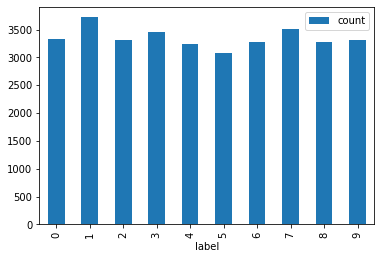

In [ ]:
# We start with adding in the count parameter to the images in train dataset
images_data = train_df.groupBy("label").count()
# images_data.show()
images_df = images_data.rdd.map(lambda r: {"label": r['label'],"count": r['count']}).collect()
pd.DataFrame(images_df).set_index("label").sort_index().plot.bar()

In [ ]:
# Assimilate a features column that is similar to the columns from the train and test data set
feature_columns = ["pixel" + str(i) for i in range(0, 784)] # pixel0 ... pixel783
print(feature_columns)

featureAssembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
train_assembler = featureAssembler.transform(train_df).select("label", "features")
test_assembler = featureAssembler.transform(test_df).select("label", "features")

train_assembler.show()
test_assembler.show()

['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7', 'pixel8', 'pixel9', 'pixel10', 'pixel11', 'pixel12', 'pixel13', 'pixel14', 'pixel15', 'pixel16', 'pixel17', 'pixel18', 'pixel19', 'pixel20', 'pixel21', 'pixel22', 'pixel23', 'pixel24', 'pixel25', 'pixel26', 'pixel27', 'pixel28', 'pixel29', 'pixel30', 'pixel31', 'pixel32', 'pixel33', 'pixel34', 'pixel35', 'pixel36', 'pixel37', 'pixel38', 'pixel39', 'pixel40', 'pixel41', 'pixel42', 'pixel43', 'pixel44', 'pixel45', 'pixel46', 'pixel47', 'pixel48', 'pixel49', 'pixel50', 'pixel51', 'pixel52', 'pixel53', 'pixel54', 'pixel55', 'pixel56', 'pixel57', 'pixel58', 'pixel59', 'pixel60', 'pixel61', 'pixel62', 'pixel63', 'pixel64', 'pixel65', 'pixel66', 'pixel67', 'pixel68', 'pixel69', 'pixel70', 'pixel71', 'pixel72', 'pixel73', 'pixel74', 'pixel75', 'pixel76', 'pixel77', 'pixel78', 'pixel79', 'pixel80', 'pixel81', 'pixel82', 'pixel83', 'pixel84', 'pixel85', 'pixel86', 'pixel87', 'pixel88', 'pixel89', 'pixel90', 'pixel91

Next, we define the hyperparameters to 
*   Use a [MultilayerPerceptronClassifier](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.classification.MultilayerPerceptronClassifier.html) model (instead of logisitic regression and random forest that were used in Lab 3)
*   Use a [Pipeline](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.Pipeline.html?highlight=pipeline#pyspark.ml.Pipeline) to compile all the data preprocessing and model fitting steps into one object (like in Lab 5)

where start from a small hidden layer `layers=[784,1,10]` with a random seed value of `223`. This defines the number of input (783), hidden (1), and output (10) layers of the digit images neural network, and keep incrementing the hidden layer till 1000.

In [ ]:
mlp_1 = MultilayerPerceptronClassifier(layers=[784, 1, 10], seed = 223, labelCol = "label", featuresCol = "features")
# Fit and transform the train and test data sets
model_1 = mlp_1.fit(train_assembler)
train_pred_1 = model_1.transform(train_assembler)
test_pred_1 = model_1.transform(test_assembler)

evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")

In [ ]:
# We calculate the accuracy of the mlp models with our evaluator by evaluating the training and testing data sets
mlp_1_train_accuracy = evaluator.evaluate(train_pred_1)
mlp_1_test_accuracy = evaluator.evaluate(test_pred_1)
print("Multilayer Perceptron Classifier Train Accuracy = %g" % mlp_1_train_accuracy)
print("Multilayer Perceptron Classifier Test Accuracy = %g" % mlp_1_test_accuracy)

Multilayer Perceptron Classifier Train Accuracy = 0.110935
Multilayer Perceptron Classifier Test Accuracy = 0.113854


In [ ]:
mlp_1_15 = MultilayerPerceptronClassifier(layers=[784, 1, 15], seed = 223, labelCol = "label", featuresCol = "features")
# Fit and transform the train and test data sets
model_1_15 = mlp_1_15.fit(train_assembler)
train_pred_1_15 = model_1_15.transform(train_assembler)
test_pred_1_15 = model_1_15.transform(test_assembler)

evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")

In [ ]:
# We calculate the accuracy of the mlp models with our evaluator by evaluating the training and testing data sets
mlp_1_15_train_accuracy = evaluator.evaluate(train_pred_1_15)
mlp_1_15_test_accuracy = evaluator.evaluate(test_pred_1_15)
print("Multilayer Perceptron Classifier Train Accuracy = %g" % mlp_1_15_train_accuracy)
print("Multilayer Perceptron Classifier Test Accuracy = %g" % mlp_1_15_test_accuracy)

Multilayer Perceptron Classifier Train Accuracy = 0.110935
Multilayer Perceptron Classifier Test Accuracy = 0.113854


Since the accuracy above seems same for both 10 and 15 layers of digital image networks, lets try increasing the hyperparameter hidden size instead. 


In [ ]:
mlp_5 = MultilayerPerceptronClassifier(layers=[784, 5, 10], seed = 223, labelCol = "label", featuresCol = "features")
# Fit and transform the train and test data sets
model_5 = mlp_5.fit(train_assembler)
train_pred_5 = model_5.transform(train_assembler)
test_pred_5 = model_5.transform(test_assembler)

In [ ]:
# We calculate the accuracy of the mlp models with our evaluator by evaluating the training and testing data sets
mlp_2_train_accuracy = evaluator.evaluate(train_pred_5)
mlp_2_test_accuracy = evaluator.evaluate(test_pred_5)
print("Multilayer Perceptron Classifier Train Accuracy = %g" % mlp_2_train_accuracy)
print("Multilayer Perceptron Classifier Test Accuracy = %g" % mlp_2_test_accuracy)

Multilayer Perceptron Classifier Train Accuracy = 0.536069
Multilayer Perceptron Classifier Test Accuracy = 0.528877


In [ ]:
mlp_10 = MultilayerPerceptronClassifier(layers=[784, 10, 10], seed = 223, labelCol = "label", featuresCol = "features")
# Fit and transform the train and test data sets
model_10 = mlp_10.fit(train_assembler)
train_pred_10 = model_10.transform(train_assembler)
test_pred_10 = model_10.transform(test_assembler)

In [ ]:
# We calculate the accuracy of the mlp models with our evaluator by evaluating the training and testing data sets
mlp_3_train_accuracy = evaluator.evaluate(train_pred_10)
mlp_3_test_accuracy = evaluator.evaluate(test_pred_10)
print("Multilayer Perceptron Classifier Train Accuracy = %g" % mlp_3_train_accuracy)
print("Multilayer Perceptron Classifier Test Accuracy = %g" % mlp_3_test_accuracy)

Multilayer Perceptron Classifier Train Accuracy = 0.488355
Multilayer Perceptron Classifier Test Accuracy = 0.493681


In [ ]:
mlp_100 = MultilayerPerceptronClassifier(layers=[784, 100, 10], seed = 223, labelCol = "label", featuresCol = "features")
# Fit and transform the train and test data sets
model_100 = mlp_100.fit(train_assembler)
train_pred_100 = model_100.transform(train_assembler)
test_pred_100 = model_100.transform(test_assembler)

In [ ]:
# We calculate the accuracy of the mlp models with our evaluator by evaluating the training and testing data sets
mlp_100_train_accuracy = evaluator.evaluate(train_pred_100)
mlp_100_test_accuracy = evaluator.evaluate(test_pred_100)
print("Multilayer Perceptron Classifier Train Accuracy = %g" % mlp_100_train_accuracy)
print("Multilayer Perceptron Classifier Test Accuracy = %g" % mlp_100_test_accuracy)

Multilayer Perceptron Classifier Train Accuracy = 0.959711
Multilayer Perceptron Classifier Test Accuracy = 0.937286


In [ ]:
mlp_500 = MultilayerPerceptronClassifier(layers=[784, 500, 10], seed = 223, labelCol = "label", featuresCol = "features")
# Fit and transform the train and test data sets
model_500 = mlp_500.fit(train_assembler)
train_pred_500 = model_500.transform(train_assembler)
test_pred_500 = model_500.transform(test_assembler)

In [ ]:
# We calculate the accuracy of the mlp models with our evaluator by evaluating the training and testing data sets
mlp_500_train_accuracy = evaluator.evaluate(train_pred_500)
mlp_500_test_accuracy = evaluator.evaluate(test_pred_500)
print("Multilayer Perceptron Classifier Train Accuracy = %g" % mlp_500_train_accuracy)
print("Multilayer Perceptron Classifier Test Accuracy = %g" % mlp_500_test_accuracy)

Multilayer Perceptron Classifier Train Accuracy = 0.995736
Multilayer Perceptron Classifier Test Accuracy = 0.963505


In [ ]:
mlp_1000 = MultilayerPerceptronClassifier(layers=[784, 1000, 10], seed = 223, labelCol = "label", featuresCol = "features")
# Fit and transform the train and test data sets
model_1000 = mlp_1000.fit(train_assembler)
train_pred_1000 = model_1000.transform(train_assembler)
test_pred_1000 = model_1000.transform(test_assembler)

In [ ]:
# We calculate the accuracy of the mlp models with our evaluator by evaluating the training and testing data sets
mlp_1000_train_accuracy = evaluator.evaluate(train_pred_1000)
mlp_1000_test_accuracy = evaluator.evaluate(test_pred_1000)
print("Multilayer Perceptron Classifier Train Accuracy = %g" % mlp_1000_train_accuracy)
print("Multilayer Perceptron Classifier Test Accuracy = %g" % mlp_1000_test_accuracy)

Multilayer Perceptron Classifier Train Accuracy = 0.99997
Multilayer Perceptron Classifier Test Accuracy = 0.965277


### Multiple layers of hyperparameters

We now try setting different values for multiple layers for the hyperparameters for mlp

In [ ]:
mlp_10_20_10 = MultilayerPerceptronClassifier(layers=[784, 10, 20, 10], seed = 223, labelCol = "label", featuresCol = "features")
# Fit and transform the train and test data sets
model_10_20_10 = mlp_10_20_10.fit(train_assembler)
train_pred_10_20_10 = model_10_20_10.transform(train_assembler)
test_pred_10_20_10 = model_10_20_10.transform(test_assembler)

In [ ]:
# We calculate the accuracy of the mlp models with our evaluator by evaluating the training and testing data sets
mlp_10_20_10_train_accuracy = evaluator.evaluate(train_pred_10_20_10)
mlp_10_20_10_test_accuracy = evaluator.evaluate(test_pred_10_20_10)
print("Multilayer Perceptron Classifier Train Accuracy = %g" % mlp_10_20_10_train_accuracy)
print("Multilayer Perceptron Classifier Test Accuracy = %g" % mlp_10_20_10_test_accuracy)

Multilayer Perceptron Classifier Train Accuracy = 0.821817
Multilayer Perceptron Classifier Test Accuracy = 0.812212


In [ ]:
mlp_50_100_150_10 = MultilayerPerceptronClassifier(layers=[784, 50, 100, 150, 10], seed = 223, labelCol = "label", featuresCol = "features")
# Fit and transform the train and test data sets
model_50_100_150_10 = mlp_50_100_150_10.fit(train_assembler)
train_pred_50_100_150_10 = model_50_100_150_10.transform(train_assembler)
test_pred_50_100_150_10 = model_50_100_150_10.transform(test_assembler)

In [ ]:
# We calculate the accuracy of the mlp models with our evaluator by evaluating the training and testing data sets
mlp_50_100_150_10_train_accuracy = evaluator.evaluate(train_pred_50_100_150_10)
mlp_50_100_150_10_test_accuracy = evaluator.evaluate(test_pred_50_100_150_10)
print("Multilayer Perceptron Classifier Train Accuracy = %g" % mlp_50_100_150_10_train_accuracy)
print("Multilayer Perceptron Classifier Test Accuracy = %g" % mlp_50_100_150_10_test_accuracy)

Multilayer Perceptron Classifier Train Accuracy = 0.898667
Multilayer Perceptron Classifier Test Accuracy = 0.889335


#### Cross-Validate the different layers of MLP

In [ ]:
# we create pipeline with the following stages
pipeline_5 = Pipeline(stages=[featureAssembler, mlp_5])

In [ ]:
# Define the hyper parameter grid
layers = [[784, 10, 10], [784, 10, 20, 10], [784, 50, 100, 150, 10]]
paramGrid = ParamGridBuilder()\
            .addGrid(mlp_5.layers, layers)\
            .build()

In [ ]:
cv_2 = CrossValidator(evaluator=evaluator, numFolds=2, estimator=pipeline_5, estimatorParamMaps=paramGrid);
cv_5 = CrossValidator(evaluator=evaluator, numFolds=5, estimator=pipeline_5, estimatorParamMaps=paramGrid);
cv_10 = CrossValidator(evaluator=evaluator, numFolds=10, estimator=pipeline_5, estimatorParamMaps=paramGrid);

In [ ]:
# If you name the fitted cross validator model `cv_fitted` below
# then the next section of code will print out the average accruacy for each solver
cv_2_fitted = cv_2.fit(test_df)
cv_5_fitted = cv_5.fit(test_df)
cv_10_fitted = cv_10.fit(test_df)

In [ ]:
# print out the accuracy of the different batch sized cross-validator
for i in range(len(layers)):
    print(f"Accuracy for {layers[i]} solver: {cv_2_fitted.avgMetrics[i]}")
    print(f"Accuracy for {layers[i]} solver: {cv_5_fitted.avgMetrics[i]}")
    print(f"Accuracy for {layers[i]} solver: {cv_10_fitted.avgMetrics[i]}")

Accuracy for [784, 10, 10] solver: 0.48887460013752615
Accuracy for [784, 10, 10] solver: 0.5095775009739028
Accuracy for [784, 10, 10] solver: 0.5468080664522081
Accuracy for [784, 10, 20, 10] solver: 0.7101401585902611
Accuracy for [784, 10, 20, 10] solver: 0.7415643860868659
Accuracy for [784, 10, 20, 10] solver: 0.7515260163790743
Accuracy for [784, 50, 100, 150, 10] solver: 0.8256768397021561
Accuracy for [784, 50, 100, 150, 10] solver: 0.8399958750618768
Accuracy for [784, 50, 100, 150, 10] solver: 0.8474810732292724


## Result Analysis

* How did changing the hyperparameters affect the error of the model?
* Are there certain inputs (digits) of data that are harder to predict? If so, which ones? What other values is the model predicting for those digits? 
* Is the model over-fitting or under-fitting? How is this affected by the hyper parameters?
* What would be some potential next steps to explore if someone were to continue this work and try to improve your model?

From the EDA above for differing values of single and multiple layers as the hyperparameters for the MultilayerPerceptronClassifier (mlp), it could be seen that by strictly increasing only the number of hidden nodes for a single layer of the MultilayerPerceptronClassifiel model, the  models increase in their accuracy and has lesser the error for the model. This could be attributed to the fact that increasing the number of hidden nodes for a single layer increases the distribution of nodes that could be trained, and decreases the bias (B0) that could formed. Hence the accuracy of the model increases with larger distribution of nodes that could trained in a single instance and also reduced bias of the model, which explains why with increasing hidden nodes set in the hyperparameter from 1 till 1000 caused a general increasing trend in the accuracy of the model. The models have high predictability for models with larger hidden value such as having hidden value of 500 or 1000. This shows that range of hidden values between 500 and 1000 might cause a best fit for the model and any model above the value 1000 or below 500 would over-fit or under-fit the model respectively. Also after a certain size of hidden nodes around 500> the model starts having slow growth in accuracy, which from our experimentation shows that 1000 (largest value tested under given time constraint) could be the lowest positive gradient which any number of nodes after point would have minimal if not no growth in the accuracy of the model.


To test if multiple layers of hyperparameters make difference in the accuracy of the mlp model, a pipeline with differing numbers of hyperparameter hidden layers and different batch size `(numFolds)` was set in paramgrid and crossvalidated using Crossvalidator of `2, 5 and 10 folds` where each of the fold represents differing batch size of increasing order. From the results obtained above for differing batch size, it could be seen that by increasing the batch size the accuracy of the MLP model increases for each individual layer from `[784, 10, 10] ... [784, 50, 100, 150, 10]`. This could be explained where by having increasing numfolds or batch size of crossvalidation, there is a lesser average loss for the predicted vs actual values of the function of the model, which shows why the accuracy of the model increased with higher batch sizes for the crossvalidation. From the data shown in cell 53, it can be seen that with increasing number of hidden layers of nodes, the models tend to be more accurate, as there is larger probability to train the models with multiple activation functions between each layers of network with increasing hidden layers which explains why the models tend to be more accurate with increasing number of hidden layers to train and perform multiple logisitic regression on the nodes. 

Some digits could have lower chance of predictability such as `0, 6, 8` as the numbers could be seen to have anamolical digit images which could cause the model to have lower accuracy of training the digit images to fit them.

The models tend to underfit between the single layered hidden node value of 5 and 10 as it could be seen from `cells 21-24` that for the hidden node value of 5 the training accuracy was `0.535956` whereas, for the larger node value of 10 the training accuracy was lower at `0.490814`. This shows that the models underfit at that particular point between node values 5-10 as hidden node value 5 had larger accuracy than hidden value 10 and from hidden values 10 and higher the accuracy started to get larger with increasing hidden node values. Overfitting of the data was not found as the hidden node value of 1000 was the maximum that could be tested due to time constraints of the experiment. 


For someone to be able to continue the work from here they would need to adjust the hidden-value of the hyperparameter together with the input size depending on how many digits that they have to train for future data sets and then adjust the input size for the hyperparameter accordingly. The team could also find ways to use parallel computing algorithms or use better hardware capabilities such as using more threads to perform the MLP computation as for increasing number of hidden layers and expecially for higher number of nodes, the RAM usage steeply increased which showed that the operation requires a larger number of processing power to complete the task in a short amount of time.